# i. Perkenalan
Azkia Mudrikah   
RMT 036  
Milestone 2  

```Problem Statements```  

This dataset contains loan history data from several individuals, including features such as salary, total assets, employment status, and other data, which can be analyzed to understand a person's loan and installment payment behavior. The data in this dataset will be analyzed using machine learning to predict whether a loan application will be approved or rejected. As a data scientist, I am tasked with building this machine learning model.

The machine learning models will be created using algorithms such as KNN, SVM, decision tree, random forest, and adaptive boosting. These five models will be tested on both the training and test data, followed by a comparison to determine which model performs best based on the ROC-AUC score. The model with the highest score will be selected, saved, and used to predict new data. The choice of the ROC-AUC score is due to its ability to indicate how well the model detects risks, making machine learning predictions more reliable.

# ii. Import libraries

Before creating the program, we need to prepare the necessary modules for building the model. This section contains the modules that are imported to create the model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc



# iii. Data Loading

This section contains the data loading process that will be used to build the machine learning model.

In [2]:
# load data
loan = pd.read_csv('data_pinjaman.csv')
# menyalin data dari dataframe utama
df = loan.copy()
# menampilkan data
df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,1/1/2010,45,25504,538,Employed,Master,24,22710,60,Married,...,2125.333333,0.553989,4,2569,0.258710,0.251165,668.120003,0.649837,0,59.0
1,1/2/2010,38,29667,494,Employed,High School,14,17824,36,Married,...,2472.250000,0.734782,8,77479,0.255824,0.204659,666.642684,0.469064,0,61.0
2,1/3/2010,47,74928,616,Employed,High School,22,10875,48,Single,...,6244.000000,0.830770,7,104228,0.197875,0.226850,346.685663,0.102768,1,38.4
3,1/4/2010,58,126821,658,Self-Employed,Bachelor,34,23669,60,Married,...,10568.416670,0.640388,1,25048,0.199669,0.199581,626.531733,0.095902,1,36.8
4,1/5/2010,37,60126,595,Employed,Associate,11,17508,60,Divorced,...,5010.500000,0.869676,7,75489,0.225008,0.220707,484.256089,0.176481,1,37.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5275,6/11/2024,49,32504,631,Employed,Associate,30,51341,24,Divorced,...,2708.666667,0.908186,4,9840,0.210841,0.219356,2661.844663,1.240036,0,48.0
5276,6/12/2024,22,48706,459,Employed,High School,0,41235,36,Married,...,4058.833333,0.641338,5,16089,0.296735,0.317049,1789.217281,0.469647,0,52.0
5277,6/13/2024,24,46372,511,Employed,Bachelor,2,8284,60,Divorced,...,3864.333333,0.969582,5,9464,0.257784,0.250726,243.499121,0.157724,0,54.0
5278,6/14/2024,30,18462,605,Employed,High School,8,24457,36,Married,...,1538.500000,0.940727,5,4879,0.206957,0.228575,944.908582,0.757822,0,51.0


After the necessary data has been successfully uploaded, we perform data inspection, such as checking the number of columns, rows, data types, and other details.

In [3]:
# menampilkan identitas dasar dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5280 entries, 0 to 5279
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             5280 non-null   object 
 1   Age                         5280 non-null   int64  
 2   AnnualIncome                5280 non-null   int64  
 3   CreditScore                 5280 non-null   int64  
 4   EmploymentStatus            5280 non-null   object 
 5   EducationLevel              5280 non-null   object 
 6   Experience                  5280 non-null   int64  
 7   LoanAmount                  5280 non-null   int64  
 8   LoanDuration                5280 non-null   int64  
 9   MaritalStatus               5280 non-null   object 
 10  NumberOfDependents          5280 non-null   int64  
 11  HomeOwnershipStatus         5280 non-null   object 
 12  MonthlyDebtPayments         5280 non-null   int64  
 13  CreditCardUtilizationRate   5280 

The output above shows that the dataframe consists of 5280 rows with an index from 0 to 5279 and 36 columns. These columns include 6 object columns, 21 integer columns, and 9 float columns. There is one column with encoded categorical values, specifically in the LoanApproved column, where 1 indicates the loan is approved and 0 indicates the loan is rejected. There is a data type mismatch in the ApplicationDate column, which should be of datetime type, but it is currently categorized as an object. In analysis, each data type is treated differently depending on its type. Incorrectly stating the data type of a value can lead to errors in the analysis results. Therefore, we need to change the data in the ApplicationDate column to datetime.

In [4]:
# mengubah value ApplicationDate menjadi date time
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'])
# memeriksa tipe data apakah sudah terubah atau belum
print(df['ApplicationDate'].dtype)

datetime64[ns]


After the data type has been successfully changed, the next step is to check for any duplicate data. Duplicate data should be removed as it can lead to inaccurate analysis results.

In [5]:
# menghitung jumlah duplikat data
df.duplicated().sum()

0

After ensuring that there is no duplicate data, the next step is to check the column names. Column names should be inspected to ensure that there are no unwanted characters, as these characters can hinder the analysis process.

In [6]:
# menampilkan nama kolom
df.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

The column names above meet the standards for analysis as they do not contain characters that could disrupt the analysis process. However, based on personal preference, I prefer all letters to be in lowercase, with each word separated by underscores. Therefore, I will modify the column names to match this preference for a more convenient analysis process.

In [7]:
# mengubah nama kolom
df.columns = df.columns.str.replace(
    r'([a-z])([A-Z])', # regular expression mencari pola huruf kecil diikuti huruf kapital
    r'\1_\2', # mengganti pola yang ditemukan code pada baris sebelumnya dengan '_'
    regex=True # regular expression agar pandas dapat melakukan pola penggantian
    ).str.lower() # mengubah upper case menjadi lower case

# memeriksa seluruh nama kolom setelah diubah
df.columns

Index(['application_date', 'age', 'annual_income', 'credit_score',
       'employment_status', 'education_level', 'experience', 'loan_amount',
       'loan_duration', 'marital_status', 'number_of_dependents',
       'home_ownership_status', 'monthly_debt_payments',
       'credit_card_utilization_rate', 'number_of_open_credit_lines',
       'number_of_credit_inquiries', 'debt_to_income_ratio',
       'bankruptcy_history', 'loan_purpose', 'previous_loan_defaults',
       'payment_history', 'length_of_credit_history',
       'savings_account_balance', 'checking_account_balance', 'total_assets',
       'total_liabilities', 'monthly_income', 'utility_bills_payment_history',
       'job_tenure', 'net_worth', 'base_interest_rate', 'interest_rate',
       'monthly_loan_payment', 'total_debt_to_income_ratio', 'loan_approved',
       'risk_score'],
      dtype='object')

After successfully renaming all column names, perform another check on the entire dataframe by displaying its basic attributes.

In [8]:
# menampilkan identitas setelah dilakukan beberapa penyesuaian pada dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5280 entries, 0 to 5279
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   application_date               5280 non-null   datetime64[ns]
 1   age                            5280 non-null   int64         
 2   annual_income                  5280 non-null   int64         
 3   credit_score                   5280 non-null   int64         
 4   employment_status              5280 non-null   object        
 5   education_level                5280 non-null   object        
 6   experience                     5280 non-null   int64         
 7   loan_amount                    5280 non-null   int64         
 8   loan_duration                  5280 non-null   int64         
 9   marital_status                 5280 non-null   object        
 10  number_of_dependents           5280 non-null   int64         
 11  home_ownership_st

The entire dataframe is now consistent, both in terms of column names and data types. The data is ready to be used for further analysis.

# iv. Exploratory Data Analysis (EDA)

This section contains an overall data analysis, including descriptive analysis, feature correlations, and other related insights.

## a. Descriptive analysis for numeric column

Descriptive analysis is conducted to determine the mean, median, mode, and estimate whether the data follows a normal distribution. Since there are 36 columns to analyze, the dataframe is divided into three parts to simplify the analysis.

- Analysis for the first group of data.

In [9]:
# filter kolom dari index 0-11
df_first_12 = df.iloc[:,:12]
# describe analisis 12 kolom pertama
df_first_12.describe()

,application_date,age,annual_income,credit_score,experience,loan_amount,loan_duration,number_of_dependents
count,5280,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000
mean,2017-03-24 12:00:00,39.749811,59653.033902,572.533712,17.518939,25190.055492,53.693182,1.545644
min,2010-01-01 00:00:00,18.000000,15000.000000,369.000000,0.000000,4122.000000,12.000000,0.000000
25%,2013-08-12 18:00:00,32.000000,32348.750000,541.000000,9.000000,15861.750000,36.000000,0.000000
50%,2017-03-24 12:00:00,40.000000,48241.500000,580.000000,17.000000,22297.500000,48.000000,1.000000
75%,2020-11-03 06:00:00,47.000000,73743.500000,610.000000,25.000000,31072.500000,72.000000,3.000000
max,2024-06-15 00:00:00,80.000000,459181.000000,692.000000,58.000000,120912.000000,120.000000,5.000000
std,NaN,11.566051,41316.945277,50.656333,11.239157,13345.419772,24.238940,1.391460


This data reflects the characteristics of customers applying for loans, with ages ranging from 18 to 80 years and an average of approximately 40 years. Annual income varies between IDR 15 million and IDR 459 million, with an average of around IDR 59 million, highlighting significant differences in customers' financial capacity. Credit scores range from 369 to 692, with a moderate average of 572, which may influence credit risk assessments. The average work experience is 17.5 years, and loan durations range from 12 to 120 months, with most customers opting for a duration of around 54 months. The number of dependents also varies, with most customers having 1 to 3 dependents.

This data can assist banks in formulating more targeted product strategies. Customers with high incomes and good credit scores can be targeted for premium product offers or loans with lower interest rates. Customers with lower credit scores may benefit from financial education programs or offers with stricter conditions to minimize the risk of default. Loan duration and the number of dependents can also be used to customize credit offers, such as providing longer tenors for customers with more dependents.

- Analysis for the second data group

In [10]:
# filter kolom dari index 12-23
df_middle_12 = df.iloc[:,12:24]
# describe analisis 12 kolom pertengahan
df_middle_12.describe()

,monthly_debt_payments,credit_card_utilization_rate,number_of_open_credit_lines,number_of_credit_inquiries,debt_to_income_ratio,bankruptcy_history,previous_loan_defaults,payment_history,length_of_credit_history,savings_account_balance,checking_account_balance
count,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000
mean,454.017424,0.288357,3.010606,1.019318,0.283461,0.051894,0.103977,23.875758,15.035417,5037.250758,1836.523864
std,244.366936,0.158421,1.733603,1.020906,0.161030,0.221834,0.305260,4.948618,8.350968,7990.123166,2366.387643
min,68.000000,0.003082,0.000000,0.000000,0.002205,0.000000,0.000000,8.000000,1.000000,34.000000,26.000000
25%,285.000000,0.163134,2.000000,0.000000,0.157327,0.000000,0.000000,20.000000,8.000000,1567.750000,557.750000
50%,403.000000,0.269941,3.000000,1.000000,0.261526,0.000000,0.000000,24.000000,15.000000,3066.500000,1106.000000
75%,564.000000,0.394994,4.000000,2.000000,0.388193,0.000000,0.000000,27.000000,22.000000,6004.750000,2179.750000
max,3134.000000,0.850532,11.000000,6.000000,0.883897,1.000000,1.000000,44.000000,29.000000,362766.000000,48871.000000


This data shows information related to the financial condition of customers applying for loans. On average, customers have a monthly installment of around IDR 454,000, with a credit card utilization ratio of approximately 29%. Most customers have about 3 open credit lines and 1 credit inquiry, with an average debt-to-income ratio of 28%. The majority of customers have no history of bankruptcy or loan defaults. The average customer payment history score is 24, while the average credit history length is about 15 years. Customer savings and checking account balances vary widely, with the average savings balance around IDR 5 million and the checking account balance about IDR 1.8 million.

This information can be used to assess loan eligibility. Customers with a lower debt-to-income ratio and a long credit history may be considered more eligible for loans, while those with lower savings and checking account balances might require more stringent terms. Credit card utilization could also serve as an important indicator in assessing the customer's risk level. A more personalized product offering strategy, such as offering loans with lower interest rates to customers with stable financial histories, can increase the chances of targeting the right customers with a lower risk of default.

- Analysis for the third data group

In [11]:
# filter kolom dari index 24-36
df_last_12 = df.iloc[:,24:36]
# describe analisis 12 kolom terakhir
df_last_12.describe()

,total_assets,total_liabilities,monthly_income,utility_bills_payment_history,job_tenure,net_worth,base_interest_rate,interest_rate,monthly_loan_payment,total_debt_to_income_ratio,loan_approved,risk_score
count,5.280000e+03,5.280000e+03,5280.000000,5280.000000,5280.000000,5.280000e+03,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000
mean,1.003899e+05,3.606649e+04,4928.020281,0.798250,4.985795,7.569210e+04,0.238668,0.238756,919.170659,0.401984,0.238447,50.648485
std,1.298363e+05,5.042617e+04,3356.111463,0.121796,2.247599,1.262399e+05,0.035017,0.041692,655.180297,0.335484,0.426174,7.741012
min,2.524000e+03,5.950000e+02,1250.000000,0.292595,0.000000,1.017000e+03,0.142389,0.113911,98.451373,0.017024,0.000000,28.000000
25%,3.111350e+04,1.135950e+04,2679.375000,0.727158,3.000000,8.766750e+03,0.213396,0.208870,501.168321,0.184116,0.000000,46.000000
50%,6.073750e+04,2.188550e+04,3997.000000,0.819759,5.000000,3.364200e+04,0.234966,0.235241,740.542521,0.302478,0.000000,52.000000
75%,1.192155e+05,4.205625e+04,6112.937500,0.891772,6.000000,8.930250e+04,0.261229,0.264822,1123.467528,0.502000,0.000000,56.000000
max,2.258428e+06,1.381947e+06,25000.000000,0.996750,16.000000,2.230240e+06,0.383341,0.404601,10397.959390,3.757217,1.000000,76.000000


This data presents information related to total assets, total liabilities, monthly income, utility bill payment history, employment duration, and several other variables that may influence the loan approval decision. On average, customers have total assets of around IDR 100 million, total liabilities of around IDR 36 million, and an average monthly income of around IDR 4.9 million. The utility bill payment history shows a fairly good average score of 0.8, with an average employment duration of around 5 years. The total debt-to-income ratio averages 40%, with average monthly loan payments around IDR 919 thousand. The risk score for customers ranges from 28 to 76, with an average score of 50.

This data can be used to assess the risk level of customers applying for loans. Customers with high total assets and lower liabilities compared to their monthly income are more likely to be approved. Longer employment durations and good utility payment history are also positive indicators. However, customers with a high debt-to-income ratio or poor credit history may require more in-depth assessment. To support business decisions, banks could offer adjusted interest rates based on the risk score and financial history of the customers, or loan products with more flexible terms for those with lower risk profiles.

## b. Analysis of categorical columns

To conduct a specific analysis on categorical columns only, the data must first be separated.

In [12]:
# filter untuk menampilkan kolom kategorikal saja
df_categorical = df.select_dtypes(include='object')
df_categorical

,employment_status,education_level,marital_status,home_ownership_status,loan_purpose
0,Employed,Master,Married,Rent,Auto
1,Employed,High School,Married,Other,Debt Consolidation
2,Employed,High School,Single,Mortgage,Auto
3,Self-Employed,Bachelor,Married,Mortgage,Other
4,Employed,Associate,Divorced,Mortgage,Auto
...,...,...,...,...,...
5275,Employed,Associate,Divorced,Mortgage,Home
5276,Employed,High School,Married,Own,Home
5277,Employed,Bachelor,Divorced,Other,Auto
5278,Employed,High School,Married,Mortgage,Education


After the data from the categorical columns is loaded into a single dataframe, we can analyze it through the following visualizations.

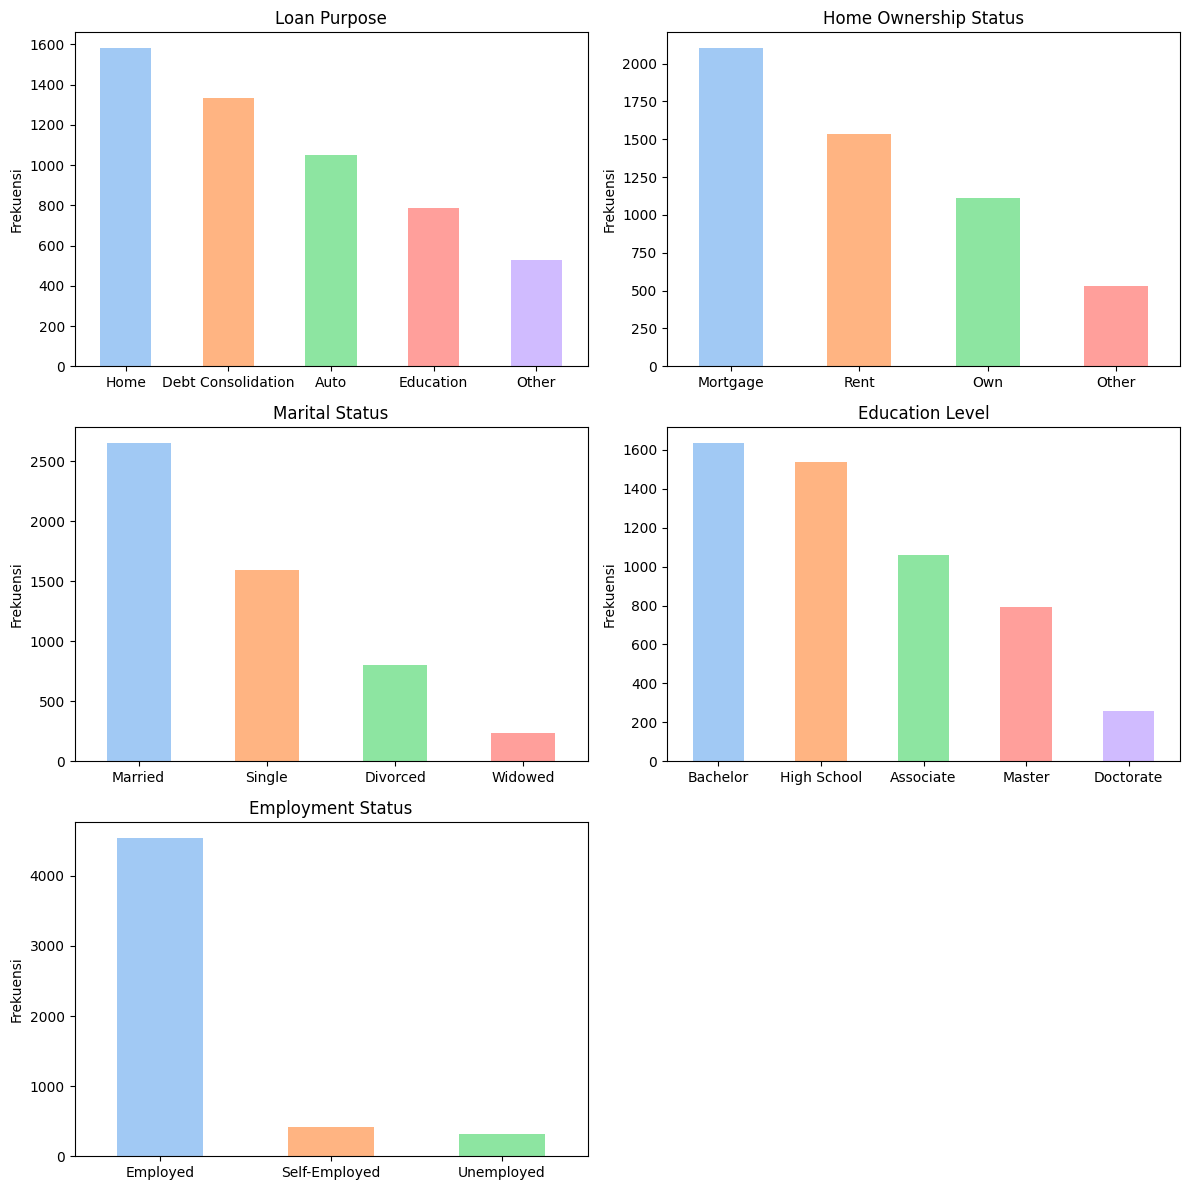

In [13]:
# mengatur warna bar
bar = sns.color_palette('pastel')

# membuat canvas untuk 5 visualisasi kolom kategorikal 
fig, axes = plt.subplots(nrows=3, # 3 baris 
                         ncols=2, # 2 kolom
                         figsize=(12,12)) # size 12x12 pixels

# ubah dataframe menjadi array untuk plot di subplot
columns = ['loan_purpose', 'home_ownership_status', 'marital_status', 'education_level', 'employment_status']

# judul/nama setiap bar plot
titles = ['Loan Purpose', 'Home Ownership Status', 'Marital Status', 'Education Level', 'Employment Status']

# plotting kolom di posisi subplot tertentu dengan looping
for i, ax in enumerate(axes.flat[:5]): # loop 5 kolom pertama, sisa sublot dibiarkan kosong
    df_categorical[columns[i]].value_counts().plot(kind='bar', # menentukan grafik bar chart
                                                   ax=ax, # memasukkan plot ke subplot dari axes.flat[:5]
                                                   color=bar, # menentukan warna bar 
                                                   rot=0) # mengatur agar nama setiap bar horizontal
    ax.set_title(titles[i]) # memberi judul sesuai dengan value pada variabel titles
    ax.set_xlabel('') # menghilangkan x label (sudah diwakili dengan value dari kolom kategorikal)
    ax.set_ylabel('Frekuensi') # memberi judul sumbu y dengan 'frekuensi'

# hapus subplot ke-6 (karena hanya ada 5 visualisasi)
fig.delaxes(axes[2, 1])

# menyesuaikan layout agar lebih rapi
plt.tight_layout()

# menampilkan visualisasi
plt.show()


1. **Loan Purpose Chart**
   - The most common loan purposes are for home purchases and debt consolidation, followed by car purchases. Loans for education and other purposes are less frequent.
   - The bank can focus on products that support home financing and debt consolidation, as these segments dominate the customers' needs.

2. **Home Ownership Chart**
   - The majority of borrowers have a mortgage, followed by those renting and owning their homes. There are also a few in the "other" category.
   - The bank could offer refinancing products or home loans to borrowers with rental status who wish to own a home, as well as provide interest rate offers to those still paying for their mortgage.

3. **Marital Status Chart**
   - The majority of borrowers are married, with singles in second place. Divorcees and widowed individuals are much less common.
   - Married borrowers tend to be more stable targets for long-term credit offerings, while singles or recently divorced individuals could be targeted for more flexible credit products tailored to their potentially varying financial situations.

4. **Educational Level Chart**
   - Most borrowers hold a bachelor's or high school diploma, followed by associate and master's degrees. Borrowers with doctoral degrees are rare in this dataset.
   - Customers with higher education (bachelor's and master's degrees) tend to have higher earning potential, so the bank can offer more exclusive financial products or investment opportunities. Meanwhile, high school graduates might need more affordable products with flexible payment terms.

5. **Employment Status Chart**
   - The majority of borrowers are permanent employees, with entrepreneurs and the unemployed being far fewer.
   - Permanent employees tend to present a lower risk group, so the bank can offer them low-interest credit products. For self-employed borrowers, a deeper credit evaluation might be necessary, or special loan products tailored for small businesses could be offered.

## c. Seeing the relationship between loan_amount and loan_duration

The purpose of viewing this visualization is to determine if there is a relationship between the loan amount and the loan duration. Specifically, whether loans with larger amounts tend to have longer repayment durations or not.

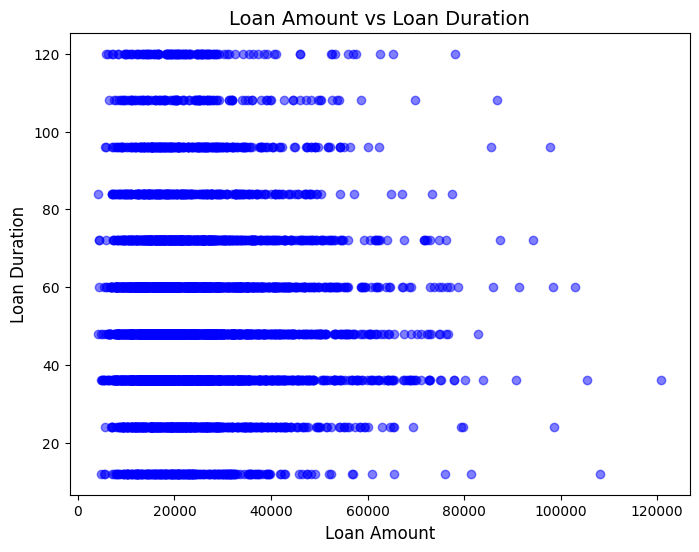

In [14]:
# mengatur ukuran canvas 8x6 pixel
plt.figure(figsize=(8,6))

# mem-plot kolom loan_amount dan loan_duration
plt.scatter(df['loan_amount'], df['loan_duration'], alpha=0.5, c='blue')

# memberikan judul plot
plt.title('Loan Amount vs Loan Duration', fontsize=14)

# mengatur x label sebagai Loan Amount
plt.xlabel('Loan Amount', fontsize=12)

# mengatur y label sebagai Loan Duration
plt.ylabel('Loan Duration', fontsize=12)

# menampilkan plot
plt.show()

From the plot, it can be seen that there is no strong relationship between the loan amount and loan duration. The loan durations are concentrated on specific values (such as 20, 40, and 60 months), which might indicate that lenders offer fixed-duration packages. Larger loans (above 80 million) tend to have longer durations (80 months or more).

The bank can focus on offering more flexible loan duration packages for larger loans or consider providing incentives for certain popular durations. Additionally, they can leverage customer segmentation based on loan duration and amount for more targeted marketing strategies.

## d. Examining the relationship between the debt-to-income ratio and payment history.

This visualization is used to analyze whether the percentage of income used for monthly payments affects the payment behavior.

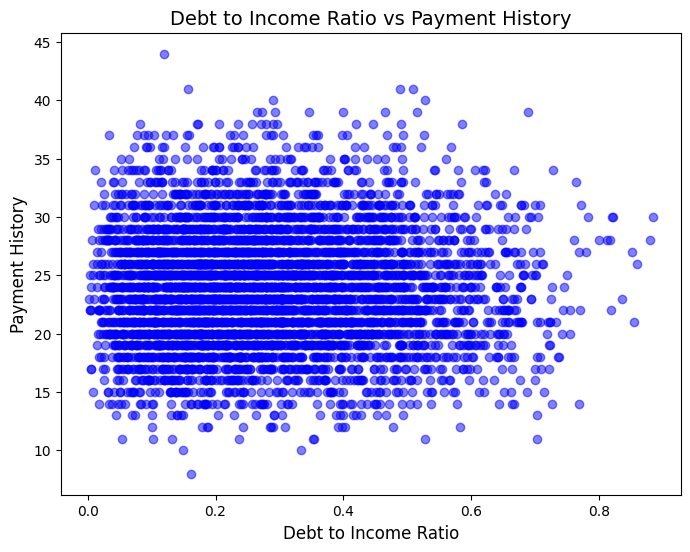

In [15]:
# mengatur ukuran canvas 8x6 pixel
plt.figure(figsize=(8,6))

# mem-plot kolom debt_to_income_ratio dan payment_history
plt.scatter(df['debt_to_income_ratio'], df['payment_history'], alpha=0.5, c='blue')

# memberikan judul plot
plt.title('Debt to Income Ratio vs Payment History', fontsize=14)

# mengatur x label sebagai Debt to Income Ratio
plt.xlabel('Debt to Income Ratio', fontsize=12)

# mengatur y label sebagai Payment History
plt.ylabel('Payment History', fontsize=12)

# menampilkan plot
plt.show()

From the plot above, there is no strong correlation between the Debt to Income Ratio (DTI) and payment history. Most of the DTI data is concentrated below 0.4 (or 40%), and the payment history varies, with most falling within the 20 to 30 range. This indicates that a higher DTI does not always correlate with a worse payment history, although there are some outliers at higher DTI values.

The bank may need to consider other factors beyond DTI when assessing creditworthiness, as a high DTI does not always indicate a poor payment history. However, keeping the DTI below 40% remains ideal to reduce the risk of default. A more flexible credit strategy may be needed for clients with moderate DTI but a good payment history.

# v. Feature Engineering

Feature engineering is the process of transforming raw data to improve the performance of machine learning models. This process involves normalization, grouping, or extracting information from specific columns. The goal is to help the model better recognize patterns and improve prediction accuracy.

### 1. split x dan y 

Separating X (features) and y (target) is done so that the model only learns from the features (X) during training, without seeing the target (y), allowing it to predict the target correctly on new data. In this machine learning task, the target is the "loan_approved" column, as we want to predict whether a loan is approved or not based on the features in the dataframe.

In [16]:
# memisahkan kolom loan_approved dari fitur 
X = df.drop(['loan_approved'], axis = 1)

# memisahkan kolom loan approved ke dalam y (target)
y = df['loan_approved']

After separating the features and target, the next step is to split the data into training and testing sets.

### 2. split train dan test 

Splitting the data into **train** and **test** sets is done to evaluate the model's performance on unseen data (test), allowing us to measure the model's ability to generalize in real-world scenarios.

In [17]:
# membagi x train, x test, y train, dan y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, # train 80% test 20%
                                                    random_state = 47) # menyatakan pemisahan train dan test secara acak
# melihat dimensi data train
print('Train Size', X_train.shape)

# melihat dimensi data test
print('Test Size', X_test.shape)

Train Size (4224, 35)
Test Size (1056, 35)


After the train and test data are separated, outliers are handled.

### 3. handling outliers 

Handling outliers is done only on the train data because the model is trained using the train data. Handling outliers here ensures that the model is trained with representative data without disrupting the distribution of the test data, which reflects real-world conditions.

In `x_train`, there is the column `application_date`, which is of date-time type. Date-time cannot have outliers because outliers are identified based on numerical distribution, while date and time data do not have extreme values that could logically be considered outliers in the context of time. Therefore, the `application_date` column is dropped from `x_train`.

In [18]:
# drop kolom application_date dari x train dan memasukkannya ke variabel baru
str_num_only = X_train.drop(['application_date'], axis = 1)
str_num_only

,age,annual_income,credit_score,employment_status,education_level,experience,loan_amount,loan_duration,marital_status,number_of_dependents,...,total_liabilities,monthly_income,utility_bills_payment_history,job_tenure,net_worth,base_interest_rate,interest_rate,monthly_loan_payment,total_debt_to_income_ratio,risk_score
4889,47,46230,615,Employed,Associate,26,20404,60,Married,1,...,7869,3852.500000,0.702889,5,56857,0.217904,0.207150,548.730990,0.244706,50.0
4916,52,63583,568,Employed,High School,29,16069,12,Divorced,0,...,57858,5298.583333,0.877915,4,4333,0.197069,0.186091,1477.868124,0.357807,57.0
2371,33,15000,616,Employed,Bachelor,11,26442,36,Divorced,1,...,5789,1250.000000,0.845548,3,5903,0.203442,0.186811,965.000575,0.858400,58.0
1053,43,26628,616,Employed,High School,21,25993,72,Married,1,...,28131,2219.000000,0.695448,2,4087,0.232993,0.191488,609.847444,0.465006,60.0
3671,50,67416,590,Employed,Bachelor,30,27396,60,Married,2,...,17516,5618.000000,0.614153,5,77415,0.237396,0.244517,795.325840,0.218107,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,18,47907,622,Self-Employed,Doctorate,0,11437,36,Divorced,1,...,17706,3992.250000,0.534625,10,18455,0.185437,0.192518,420.692491,0.343589,59.0
691,53,130354,514,Self-Employed,Doctorate,30,26277,96,Single,2,...,10571,10862.833330,0.717286,4,105045,0.304277,0.302250,728.757921,0.103082,38.4
3336,23,37869,554,Employed,Master,3,24435,60,Single,0,...,26716,3155.750000,0.832097,3,67518,0.252435,0.248613,715.214667,0.332794,48.0
1926,18,46196,464,Employed,Master,0,43727,36,Single,1,...,4424,3849.666667,0.773940,2,44577,0.296727,0.336129,1943.859045,0.732235,54.0


After separating the date-time column, we will proceed with handling outliers only on numeric columns because outliers are defined based on statistical distributions, which only apply to numerical data.

Before handling outliers, we need to first examine the distribution of the data.

In [19]:
# ambil data numerik saja
num_cols = str_num_only.select_dtypes(exclude='object')

#list untuk menyimpan informasi skewness
listItem= []

# lop untuk setiap kolom numerik
for col in num_cols:
  #menghitung skewness
  skew_value = round(str_num_only[col].skew(), 2) 
  #Interpretasi hasil perhitungan skewness
  distribution = np.where((skew_value <= 0.5) & (skew_value >= -0.5),'normal', 'skewed')
  #Menyimpan interpretasi skewness ke dalam list
  listItem.append([col, skew_value, distribution])
  #List to item
  skewness = pd.DataFrame(columns=['nama_kolom', 'nilai_skewness', 'distribution'], data=listItem)
skewness

,nama_kolom,nilai_skewness,distribution
0,age,0.16,normal
1,annual_income,2.35,skewed
2,credit_score,-0.64,skewed
3,experience,0.30,normal
4,loan_amount,1.56,skewed
5,loan_duration,0.66,skewed
6,number_of_dependents,0.58,skewed
7,monthly_debt_payments,2.07,skewed
8,credit_card_utilization_rate,0.52,skewed
9,number_of_open_credit_lines,0.60,skewed


After examining the data distribution, it appears that some columns follow a normal distribution, while others are skewed or not normally distributed. Next, we perform an inspection of the upper and lower bounds for each value in the columns. This check is done to detect the presence of outliers.

In [20]:
#list untuk menyimpan informasi kolom, batas bawah, batas atas
column = []
lower_bound = []
upper_bound = []

#loop setiap baris dalam DataFrame skewness
for row in range(0, len(skewness)):
    col = skewness['nama_kolom'][row]
    
    #memeriksa batas atas dan bawah
    if skewness['distribution'][row] == 'skewed':
        #menghitung IQR (Interquartile Range)
        IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
        #menghitung batas bawah dan batas atas
        lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
        upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
    else:
        #menggunakan mean dan standar deviasi untuk kolom yang tidak miring
        lower_boundary = X_train[col].mean() - 3 * X_train[col].std()
        upper_boundary = X_train[col].mean() + 3 * X_train[col].std()
    #menggunakan pengali 3 karena data dalam dataframe highly skewed

    #menambahkan nama kolom dan batas ke dalam list
    column.append(col)
    lower_bound.append(lower_boundary)
    upper_bound.append(upper_boundary)

    #list to clumn
    boundaries_df = pd.DataFrame({'column': column,'lower_bound': lower_bound,'upper_bound': upper_bound})
boundaries_df

,column,lower_bound,upper_bound
0,age,5.225034,74.510288
1,annual_income,-90203.750000,196124.250000
2,credit_score,334.000000,817.000000
3,experience,-15.995845,51.279462
4,loan_amount,-29932.000000,76998.250000
5,loan_duration,-36.000000,132.000000
6,number_of_dependents,-9.000000,12.000000
7,monthly_debt_payments,-544.000000,1395.000000
8,credit_card_utilization_rate,-0.533128,1.091868
9,number_of_open_credit_lines,-4.000000,10.000000


After determining the upper and lower bounds, the next step is to check the percentage of outliers in each column.

In [21]:
# list  untuk menyimpan persentase outliers
percentage = []

#loop untuk menghitung persentase outliers
for row in range(0, len(column)):
    col = column[row]

    # hitung persentase outliers berdasarkan batas atas dan batas bawah
    total_outlier = (
        (len(X_train[X_train[col] > upper_bound[row]]) / len(X_train) * 100) + 
        (len(X_train[X_train[col] < lower_bound[row]]) / len(X_train) * 100)
    )

    # memasukkan hasil persentase ke list percentage
    percentage.append(total_outlier)

# membuat dataframe untuk persentase outliers
outliers = pd.DataFrame({
    'column':column,
    'persentase': [round(percent, 2) for percent in percentage]
})

# menampilkan hasil
outliers

,column,persentase
0,age,0.28
1,annual_income,1.28
2,credit_score,0.00
3,experience,0.31
4,loan_amount,0.50
5,loan_duration,0.00
6,number_of_dependents,0.00
7,monthly_debt_payments,0.64
8,credit_card_utilization_rate,0.00
9,number_of_open_credit_lines,0.02


The results above show that the percentage of outliers in several columns tends to be large. However, in this case, both large and small outliers are treated the same way, which is by capping. In my opinion, the presence of outliers in this loan data is necessary because they may significantly influence the analysis.

In [22]:
# define fungsi untuk capping dgn persentil 1 dan persentil 99
def capping(num_cols, column):
    lower_cap = num_cols[column].quantile(0.01)
    upper_cap = num_cols[column].quantile(0.99)

    # jika ada nilai < lower cap, maka nilai tersebut akan diganti menggunakan nilai lower cap
    num_cols[column] = np.where(num_cols[column] < lower_cap, lower_cap, num_cols[column])
    # jika ada nilai > upper cap, maka nilai tersebut akan diganti menggunakan nilai upper cap
    num_cols[column] = np.where(num_cols[column] > upper_cap, upper_cap, num_cols[column])
    return num_cols

# looping untuk capping setiap kolom
for col in num_cols:
    num_cols_capped = capping(num_cols, col)

After the outliers have been handled, the next step is to analyze the missing values.

### 4. Handling Missing value

Handling missing values is done to ensure that the model is trained with complete and accurate data, and to prevent bias or prediction errors.

In [24]:
# memeriksa missing value pada data train
X_train.isnull().sum()

application_date                 0
age                              0
annual_income                    0
credit_score                     0
employment_status                0
education_level                  0
experience                       0
loan_amount                      0
loan_duration                    0
marital_status                   0
number_of_dependents             0
home_ownership_status            0
monthly_debt_payments            0
credit_card_utilization_rate     0
number_of_open_credit_lines      0
number_of_credit_inquiries       0
debt_to_income_ratio             0
bankruptcy_history               0
loan_purpose                     0
previous_loan_defaults           0
payment_history                  0
length_of_credit_history         0
savings_account_balance          0
checking_account_balance         0
total_assets                     0
total_liabilities                0
monthly_income                   0
utility_bills_payment_history    0
job_tenure          

In [25]:
# memeriksa missing value pada data test
X_test.isnull().sum()

application_date                 0
age                              0
annual_income                    0
credit_score                     0
employment_status                0
education_level                  0
experience                       0
loan_amount                      0
loan_duration                    0
marital_status                   0
number_of_dependents             0
home_ownership_status            0
monthly_debt_payments            0
credit_card_utilization_rate     0
number_of_open_credit_lines      0
number_of_credit_inquiries       0
debt_to_income_ratio             0
bankruptcy_history               0
loan_purpose                     0
previous_loan_defaults           0
payment_history                  0
length_of_credit_history         0
savings_account_balance          0
checking_account_balance         0
total_assets                     0
total_liabilities                0
monthly_income                   0
utility_bills_payment_history    0
job_tenure          

The result of the missing value check above shows that there are no missing values in both the test and train data. Next, a cardinality check is performed.

### 5. Cardinality Check

Cardinality check is performed to determine how many unique values exist in each categorical column.

In [26]:
# memasukkan list kolom yang berisi kategorikal ke variabel cat_cols
cat_cols = list(df.select_dtypes(include='object').columns)

# list kosong untuk menyimpan nama kolom, jumlah nunique, dan nilai unique
listItem = []

# looping untuk setiap kolom pada cat_cols
for col in cat_cols:
  # memasukkan nama kolom, jumlah nunique dan nilai unique ke list
  listItem.append([col, df[col].nunique(), df[col].unique()])

# memasukkan data dalam list ke data frame 
pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,employment_status,3,"[Employed, Self-Employed, Unemployed]"
1,education_level,5,"[Master, High School, Bachelor, Associate, Doc..."
2,marital_status,4,"[Married, Single, Divorced, Widowed]"
3,home_ownership_status,4,"[Rent, Other, Mortgage, Own]"
4,loan_purpose,5,"[Auto, Debt Consolidation, Other, Home, Educat..."


The cardinality check results above show that there are no columns with high cardinality (many unique values). The cardinality of the data will be handled in the feature encoding section according to the type of each categorical feature, after going through the feature selection process.

### 6. Separating numerical and categorical columns.

In the outlier handling section, we have already separated the categorical and numerical columns, and outlier handling has been performed on the numerical columns. Therefore, there is no need for further separation of the numerical columns; we can simply use the capping results from the outlier handling.

In [27]:
num_cols_capped

,age,annual_income,credit_score,experience,loan_amount,loan_duration,number_of_dependents,monthly_debt_payments,credit_card_utilization_rate,number_of_open_credit_lines,...,total_liabilities,monthly_income,utility_bills_payment_history,job_tenure,net_worth,base_interest_rate,interest_rate,monthly_loan_payment,total_debt_to_income_ratio,risk_score
4889,47.0,46230.0,615.0,26.0,20404.0,60.0,1.0,394.0,0.346376,2.0,...,7869.0,3852.500000,0.702889,5.0,56857.0,0.217904,0.207150,548.730990,0.244706,50.0
4916,52.0,63583.0,568.0,29.0,16069.0,12.0,0.0,418.0,0.184987,3.0,...,57858.0,5298.583333,0.877915,4.0,4333.0,0.197069,0.186091,1477.868124,0.357807,57.0
2371,33.0,15000.0,616.0,11.0,26442.0,36.0,1.0,124.0,0.534023,2.0,...,5789.0,1250.000000,0.845548,3.0,5903.0,0.203442,0.186811,965.000575,0.858400,58.0
1053,43.0,26628.0,616.0,21.0,25993.0,72.0,1.0,422.0,0.163250,3.0,...,28131.0,2219.000000,0.695448,2.0,4087.0,0.232993,0.191488,609.847444,0.465006,60.0
3671,50.0,67416.0,590.0,30.0,27396.0,60.0,2.0,430.0,0.220106,1.0,...,17516.0,5618.000000,0.614153,5.0,77415.0,0.237396,0.244517,795.325840,0.218107,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,18.0,47907.0,622.0,0.0,11437.0,36.0,1.0,951.0,0.403778,4.0,...,17706.0,3992.250000,0.534625,10.0,18455.0,0.185437,0.192518,420.692491,0.343589,59.0
691,53.0,130354.0,514.0,30.0,26277.0,96.0,2.0,391.0,0.326038,1.0,...,10571.0,10862.833330,0.717286,4.0,105045.0,0.304277,0.302250,728.757921,0.103082,38.4
3336,23.0,37869.0,554.0,3.0,24435.0,60.0,0.0,335.0,0.196903,3.0,...,26716.0,3155.750000,0.832097,3.0,67518.0,0.252435,0.248613,715.214667,0.332794,48.0
1926,18.0,46196.0,464.0,0.0,43727.0,36.0,1.0,875.0,0.431865,2.0,...,4424.0,3849.666667,0.773940,2.0,44577.0,0.296727,0.336129,1943.859045,0.732235,54.0


Ordinal and nominal categorical features require different treatments, so we need to separate the ordinal categorical columns from the nominal categorical columns.

Ordinal Categorical:  
- **education_level**: There is a clear hierarchy based on education level (Master > Bachelor > Associate, etc.)  
- **home_ownership_status**: In the case of loan applications, home ownership status can be considered ordinal, where lenders may prioritize borrowers who already own a home over those who do not. This is because individuals who already own a home typically have the main focus of paying off their debts, rather than renting or paying for a mortgage (Own > Mortgage > Rent > Other).  

Nominal Categorical:  
- **employment_status**: No specific order (Employed, Self-Employed, Unemployed are all equivalent without any ranking).  
- **marital_status**: No clear hierarchy (Married, Single, Divorced, Widowed are all equivalent).  
- **loan_purpose**: There is no ranking between the types of loan purposes (Auto, Debt Consolidation, etc.).  

In [28]:
# kategorikal ordinal
cat_col_ordinal = X_train[['education_level', 'home_ownership_status']]

# kategorikal nominal
cat_col_nominal = X_train[['employment_status', 'marital_status','loan_purpose']]

After the separation of each column, the next step is to perform feature selection.

### 7. Feature Selection

Feature selection is performed to eliminate columns that do not have a correlation with the target, allowing the model to be trained only on data that is relevant to the target.

First, a correlation analysis is conducted between the categorical columns and the target.

In [29]:
# Daftar kolom kategorikal
cat_columns = ['education_level', 'home_ownership_status', 'employment_status', 'marital_status', 'loan_purpose']

# Iterasi untuk setiap kolom kategorikal terhadap target y_train
for col in cat_columns:
    # Buat tabel kontingensi antara kolom kategorikal dan target y_train
    contingency_table = pd.crosstab(X_train[col], y_train)
    
    # Hitung Chi-Square
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Cetak hasil
    print(f"\nKolom: {col} vs Target (y_train)")
    print(f"Chi-Square: {chi2}")
    print(f"P-Value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Signifikan" if p < 0.05 else "Tidak signifikan")


Kolom: education_level vs Target (y_train)
Chi-Square: 160.5311791280842
P-Value: 1.1246154771302979e-33
Degrees of Freedom: 4
Signifikan

Kolom: home_ownership_status vs Target (y_train)
Chi-Square: 12.22148257434225
P-Value: 0.006661713102189758
Degrees of Freedom: 3
Signifikan

Kolom: employment_status vs Target (y_train)
Chi-Square: 2.8639518713086467
P-Value: 0.23883653007385863
Degrees of Freedom: 2
Tidak signifikan

Kolom: marital_status vs Target (y_train)
Chi-Square: 2.3056429607044593
P-Value: 0.5114407275820494
Degrees of Freedom: 3
Tidak signifikan

Kolom: loan_purpose vs Target (y_train)
Chi-Square: 2.6527149061594546
P-Value: 0.6175138796121057
Degrees of Freedom: 4
Tidak signifikan


The 'education_level' and 'home_ownership_status' columns have a correlation with y_train, so these columns are retained, while the others are dropped.

We have separated the ordinal and nominal categorical columns, and based on the correlation results, it is evident that the nominal categorical columns do not correlate with the target. Therefore, only the ordinal categorical columns are retained in this case.

Next, we perform a correlation analysis between the numerical columns and the target.

In [30]:
# korelasi kolom numerikal dengan y train

# list kosong untuk menyimpan p_value, hasil interpretasi, dan nama kolom
p_values = []
interpretasi = []
cols = []

# looping untuk setiap kolom pada num_cols_capped
for col in num_cols_capped.columns:
  # menghitung korelasi dan p_value antara kolom numerikal dan target
  corr_coef, p_value = pearsonr(num_cols_capped[col], y_train)

  # menambahkan nilai p_value dan nama kolom ke list
  p_values.append(p_value)
  cols.append(col)

  # kondisi untuk menyatakan apakah terdapat korelasi atau tidak
  if p_value < 0.05:
    # menambahkan hasil interpretasi ke list
    interpretasi.append('ada korelasi')
  else :
    # menambahkan hasil interpretasi ke list
    interpretasi.append('ga ada korelasi')

# memasukkan hasil ke dalam dataframe
pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,age,ada korelasi
1,annual_income,ada korelasi
2,credit_score,ada korelasi
3,experience,ada korelasi
4,loan_amount,ada korelasi
5,loan_duration,ada korelasi
6,number_of_dependents,ada korelasi
7,monthly_debt_payments,ada korelasi
8,credit_card_utilization_rate,ga ada korelasi
9,number_of_open_credit_lines,ga ada korelasi


The columns that have a correlation with the target and are retained are: 'age', 'annual_income', 'credit_score', 'experience', 'loan_amount', 'loan_duration', 'number_of_dependents', 'monthly_debt_payments', 'bankruptcy_history', 'previous_loan_defaults', 'length_of_credit_history', 'checking_account_balance', 'total_assets', 'monthly_income', 'net_worth', 'base_interest_rate', 'interest_rate', 'monthly_loan_payment', 'total_debt_to_income_ratio', and 'risk_score'.

In [31]:
# drop kolom yang tidak diperlukan
num_cols_capped.drop(columns=['credit_card_utilization_rate', 'number_of_open_credit_lines', 'number_of_credit_inquiries', 'debt_to_income_ratio','payment_history','savings_account_balance', 'total_liabilities', 'utility_bills_payment_history', 'job_tenure'], inplace=True)

Next, the names of the columns that are retained are gathered into lists according to their types to be assigned into the preprocessor (data transformations will be performed within this variable).

In [32]:
# memasukkan nama-nama kolom yang akan digunakan pada model ke dalam variabel baru

# list kolom numerikal
num_cols_list_fix = ['age', 'annual_income', 'credit_score', 'experience', 'loan_amount',
       'loan_duration', 'number_of_dependents', 'monthly_debt_payments',
       'bankruptcy_history', 'previous_loan_defaults',
       'length_of_credit_history', 'checking_account_balance', 'total_assets',
       'monthly_income', 'net_worth', 'base_interest_rate', 'interest_rate',
       'monthly_loan_payment', 'total_debt_to_income_ratio', 'risk_score']

# list kolom kategorikal
cat_col_list_fix = ['education_level', 'home_ownership_status']

### 8. Feature scaling and encoding 

Feature scaling is performed to ensure that the numerical data is within the same range. This is important because if the data is within different ranges, the model may tend to be trained only on the data with a larger scale. Scaling is done using the StandardScaler because the numerical data has already been handled for outliers, and it is assumed to be normally distributed.

Feature encoding is done to make categorical data processable by the model, as models typically can only read numerical data. In this case, encoding is done using OrdinalEncoder because the categorical features used for model training are ordinal.

Scaling and encoding are performed within the preprocessor, allowing data to be scaled and encoded simultaneously.

In [33]:
# prepocessor untuk melakukan transformasi berdasarkan jenis data
preprocessor = ColumnTransformer(
    transformers=[ # berisi jenis transformasi yang akan dilakukan
        # encoding kolom kategorikal menggunakan ordinal encoder
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', #handling unknown value
                               unknown_value=-1), # unknown value di encode dengan -1
                               cat_col_list_fix), # nama-nama kolom yang di encode
        
        # scaling menggunakan standar scaling pada kolom numerikal
        ('num', StandardScaler(), num_cols_list_fix)
    ]
)

# vi. Model Definition

Model definition is carried out to determine the type of machine learning model to be used. As stated earlier, this machine learning model will be trained using 5 different models, and the performance of these models will be compared to identify the best one.

Each model's performance will also be evaluated through cross-validation. Cross-validation is performed to ensure that the model minimizes the risk of overfitting and provides a more reliable estimation of the model's performance.

The performance is evaluated based on the ROC-AUC score because ROC-AUC measures the model's ability to distinguish between positive and negative classes as a whole, and it remains effective even when the data is imbalanced.

- K-Nearest Neighbors  

In [34]:
# KNN

# looping untuk mendapat index kolom kategorikal dari data train
categorical_index = [X_train.columns.get_loc(col) for col in cat_col_list_fix]

# define model knn dengan 3 tetangga terdekat
knn = KNeighborsClassifier(n_neighbors=3)

# define pipeline
pipe_knn = Pipeline(steps=[ # langkah-langkah dalam pipeline
    # transformasi data dengan prepocessor
    ('preprocessing', preprocessor), 
    # handling imbalance data pada target
    ('smote', SMOTENC(categorical_features=categorical_index, random_state=42)), 
    # menambahkan model knn
    ('classifier', knn)
    ])

- SVM (Support Vector Machine)  

In [35]:
#SVM

# looping untuk mendapat index kolom kategorikal dari data train
categorical_index = [X_train.columns.get_loc(col) for col in cat_col_list_fix]

# define model svm
svm = SVC(probability=True, # memungkinkan untuk perhitungan probabilitas
          kernel='linear') # memisahkan dataset dengan garis lurus
# define pipeline
pipe_svm = Pipeline(steps=[ # langkah dalam pipeline
    # transformasi data dengan prepocessor
    ('preprocessing', preprocessor),
    # handling imbalance data pada target
    ('smote', SMOTENC(categorical_features=categorical_index, random_state=42)),
    # menambahkan model svm
    ('classifier', svm)
    ])

- Decision Tree  

In [36]:
#DT

# looping untuk mendapat index kolom kategorikal dari data train
categorical_index = [X_train.columns.get_loc(col) for col in cat_col_list_fix]

# define model dt 
dt = DecisionTreeClassifier(max_depth=6, # batas jumlah lapisan decision tree = 6
                            random_state=10) # generate secara acak 
# define pipeline
pipe_dt = Pipeline(steps=[ # langkah dalam pipeline
    # transformasi data dengan prepocessor
    ('preprocessing', preprocessor),
    # handling imbalance data pada target
    ('smote', SMOTENC(categorical_features=categorical_index, random_state=42)),
    #  menambahkan model dt
    ('classifier', dt)
    ])

- Random Forest  

In [37]:
#RF

# looping untuk mendapat index kolom kategorikal dari data train
categorical_index = [X_train.columns.get_loc(col) for col in cat_col_list_fix]
# define model rf
rf = RandomForestClassifier(
    n_estimators=50, # 50 decision trees
    max_depth=5, # batas jumlah lapisan decision trees = 5
    random_state=42) # generate secara acak 
# define pipeline
pipe_rf = Pipeline(steps=[ # langkah dalam pipeline
    # transformasi data dengan prepocessor
    ('preprocessing', preprocessor),
    # handling imbalance data pada target
    ('smote', SMOTENC(categorical_features=categorical_index, random_state=42)),
    #  menambahkan model rf
    ('classifier', rf)
    ])

- Adaptive Boosting (adaboost)  

In [38]:
# AB
# looping untuk mendapat index kolom kategorikal dari data train
categorical_index = [X_train.columns.get_loc(col) for col in cat_col_list_fix]

# define model ab
ab = AdaBoostClassifier(
    n_estimators=500, # menggabungkan 500 weak learners
    random_state=42) # generate secara acak
pipe_ab = Pipeline(steps=[ # langkah dalam pipeline
    ('preprocessing', preprocessor),
    # handling imbalance data pada target
    ('smote', SMOTENC(categorical_features=categorical_index, random_state=42)),
    #  menambahkan model ab
    ('classifier', ab)
    ])

After all the models have been defined, the next step is to train these models on the training data.

# vii. Model Training

Model training is performed to teach machine learning algorithms to recognize patterns in the data, enabling them to make predictions or decisions based on new data.

- Training model KNN

In [39]:
pipe_knn.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['education_level',
                                                   'home_ownership_status']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'annual_income',
                                                   'credit_score', 'experience',
                                                   'loan_amount',
                                                   'loan_duration',
                                                   'number_of_dependents',
                                                   'monthly_debt_payments',
                                                   'bankruptcy_history',
                                                   'previous_loan_defaults',
                                                   'length_of_credit_history',
                                                   'checking_account_balance',
                                                   'total_assets',
                                                   'monthly_income',
                                                   'net_worth',
                                                   'base_interest_rate',
                                                   'interest_rate',
                                                   'monthly_loan_payment',
                                                   'total_debt_to_income_ratio',
                                                   'risk_score'])])),
                ('smote',
                 SMOTENC(categorical_features=[5, 11], random_state=42)),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

- Training model SVM

In [40]:
pipe_svm.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['education_level',
                                                   'home_ownership_status']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'annual_income',
                                                   'credit_score', 'experience',
                                                   'loan_amount',
                                                   'loan_duration',
                                                   'number_of_dependents',
                                                   'monthly_debt_payments',
                                                   'bankruptcy_h...y',
                                                   'previous_loan_defaults',
                                                   'length_of_credit_history',
                                                   'checking_account_balance',
                                                   'total_assets',
                                                   'monthly_income',
                                                   'net_worth',
                                                   'base_interest_rate',
                                                   'interest_rate',
                                                   'monthly_loan_payment',
                                                   'total_debt_to_income_ratio',
                                                   'risk_score'])])),
                ('smote',
                 SMOTENC(categorical_features=[5, 11], random_state=42)),
                ('classifier', SVC(kernel='linear', probability=True))])

- Training model Decision Tree

In [41]:
pipe_dt.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['education_level',
                                                   'home_ownership_status']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'annual_income',
                                                   'credit_score', 'experience',
                                                   'loan_amount',
                                                   'loan_duration',
                                                   'number_of_dependents',
                                                   'monthly_debt_payments',
                                                   'bankruptcy_h...
                                                   'previous_loan_defaults',
                                                   'length_of_credit_history',
                                                   'checking_account_balance',
                                                   'total_assets',
                                                   'monthly_income',
                                                   'net_worth',
                                                   'base_interest_rate',
                                                   'interest_rate',
                                                   'monthly_loan_payment',
                                                   'total_debt_to_income_ratio',
                                                   'risk_score'])])),
                ('smote',
                 SMOTENC(categorical_features=[5, 11], random_state=42)),
                ('classifier',
                 DecisionTreeClassifier(max_depth=6, random_state=10))])

- Training model Random Forest

In [42]:
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['education_level',
                                                   'home_ownership_status']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'annual_income',
                                                   'credit_score', 'experience',
                                                   'loan_amount',
                                                   'loan_duration',
                                                   'number_of_dependents',
                                                   'monthly_debt_payments',
                                                   'bankruptcy_h...
                                                   'length_of_credit_history',
                                                   'checking_account_balance',
                                                   'total_assets',
                                                   'monthly_income',
                                                   'net_worth',
                                                   'base_interest_rate',
                                                   'interest_rate',
                                                   'monthly_loan_payment',
                                                   'total_debt_to_income_ratio',
                                                   'risk_score'])])),
                ('smote',
                 SMOTENC(categorical_features=[5, 11], random_state=42)),
                ('classifier',
                 RandomForestClassifier(max_depth=5, n_estimators=50,
                                        random_state=42))])

- Training model AdaBoost

In [43]:
pipe_ab.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['education_level',
                                                   'home_ownership_status']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'annual_income',
                                                   'credit_score', 'experience',
                                                   'loan_amount',
                                                   'loan_duration',
                                                   'number_of_dependents',
                                                   'monthly_debt_payments',
                                                   'bankruptcy_h...
                                                   'previous_loan_defaults',
                                                   'length_of_credit_history',
                                                   'checking_account_balance',
                                                   'total_assets',
                                                   'monthly_income',
                                                   'net_worth',
                                                   'base_interest_rate',
                                                   'interest_rate',
                                                   'monthly_loan_payment',
                                                   'total_debt_to_income_ratio',
                                                   'risk_score'])])),
                ('smote',
                 SMOTENC(categorical_features=[5, 11], random_state=42)),
                ('classifier',
                 AdaBoostClassifier(n_estimators=500, random_state=42))])

After training all the models, the next step is model evaluation.

# viii. Model Evaluation

Model evaluation is performed to measure the performance of the machine learning model, ensuring that it can generalize well on unseen data and helping to identify areas for improvement before being deployed in real-world applications. The model's performance is assessed using the ROC AUC score, which indicates how well the model can distinguish between positive and negative classes. A score close to 1 indicates excellent classification ability, while a score below 0.5 suggests poor performance.

- Uji Performa KNN

In [44]:
# menghitung ROC-AUC score dalam pipeline KNN
roc_auc_train_cross_val = cross_val_score(pipe_knn,
                                     X_test, # fitur data test
                                     y_test, # target
                                     cv=3, # 3 fold untuk cross-val
                                     scoring="roc_auc") # metrik ROC-AUC skor untuk evaluasi

# print rata-rata skor ROC-AUC
print('ROC AUC Score - Mean - Cross Validation : ', roc_auc_train_cross_val.mean())

ROC AUC Score - Mean - Cross Validation :  0.9517238783498945


The average ROC AUC score of 0.952 for KNN indicates that the model has excellent ability to distinguish between positive and negative classes.

- Uji Performa SVM

In [45]:
# menghitung ROC-AUC score dalam pipeline SVM
roc_auc_train_cross_val = cross_val_score(pipe_svm,
                                     X_test, # fitur data test
                                     y_test, # target
                                     cv=3, # 3 fold untuk cross-val
                                     scoring="roc_auc") # metrik ROC-AUC skor untuk evaluasi

# print rata-rata skor ROC-AUC
print('ROC AUC Score - Mean - Cross Validation : ', roc_auc_train_cross_val.mean())

ROC AUC Score - Mean - Cross Validation :  0.9987503763926528


The average ROC AUC score of 0.999 for SVM indicates that the model is nearly perfect in distinguishing between positive and negative classes, demonstrating excellent performance.

- Uji Performa Decision Tree

In [46]:
# menghitung ROC-AUC score dalam pipeline DT
roc_auc_train_cross_val = cross_val_score(pipe_dt,
                                     X_test, # fitur data test
                                     y_test, # target
                                     cv=3, # 3 fold untuk cross-val
                                     scoring="roc_auc") # metrik ROC-AUC skor untuk evaluasi

# print rata-rata skor ROC-AUC
print('ROC AUC Score - Mean - Cross Validation : ', roc_auc_train_cross_val.mean())

ROC AUC Score - Mean - Cross Validation :  0.9575654923215898


The average ROC AUC score of 0.958 for the Decision Tree model indicates that the model has good capability in distinguishing between positive and negative classes.

- Uji Performa Random Forest

In [47]:
# menghitung ROC-AUC score dalam pipeline RF
roc_auc_train_cross_val = cross_val_score(pipe_rf,
                                     X_test, # fitur data test
                                     y_test, # target
                                     cv=3, # 3 fold untuk cross-val
                                     scoring="roc_auc") # metrik ROC-AUC skor untuk evaluasi

# print rata-rata skor ROC-AUC
print('ROC AUC Score - Mean - Cross Validation : ', roc_auc_train_cross_val.mean())

ROC AUC Score - Mean - Cross Validation :  0.9951068955133996


The average ROC AUC score of 0.995 for the Random Forest model indicates that the model is highly effective in distinguishing between positive and negative classes, reflecting outstanding performance.

- Uji Performa AdaBoost

In [48]:
# menghitung ROC-AUC score dalam pipeline AB
roc_auc_train_cross_val = cross_val_score(pipe_ab,
                                     X_test, # fitur data test
                                     y_test, # target
                                     cv=3, # 3 fold untuk cross-val
                                     scoring="roc_auc") # metrik ROC-AUC skor untuk evaluasi

# print rata-rata skor ROC-AUC
print('ROC AUC Score - Mean - Cross Validation : ', roc_auc_train_cross_val.mean())

ROC AUC Score - Mean - Cross Validation :  0.9977115326708823


The average ROC AUC score of 0.998 for the AdaBoost model indicates that the model is almost perfect in distinguishing between positive and negative classes, demonstrating very impressive performance.

Based on the ROC-AUC scores, it can be concluded that SVM is the best model. 

Therefore, the SVM model is tuned because its ROC-AUC score, which is close to 1, indicates that the model has a very high ability to differentiate between positive and negative classes, suggesting that the model has the potential to achieve optimal performance. Hyperparameter tuning is performed to further improve accuracy, reduce the possibility of overfitting, and ensure that the model remains robust and effective on diverse real-world data.

In [ ]:
# fungsi untuk menguji model pada data test
def performance_check(pipe_svm, X, y):
    # memprediksi label dari fitur yang diberikan menggunakan svm
    y_pred = pipe_svm.predict(X)
    # menghitung skor roc-auc pada target
    roc_auc = roc_auc_score(y, y_pred)
    # menampilkan skor ROC-AUC
    print(f"ROC-AUC-Score: {roc_auc:.4f}")

# define parameter yang akan dicari dalam randomsearch
param_distributions = {
    'classifier__C': [0.1, 1, 10, 100],  # nilai untuk parameter C
    'classifier__kernel': ['linear'],  # menggunakan kernel linear
}
# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(pipe_svm, param_distributions, n_iter=200, cv=2, scoring='roc_auc', random_state=42)
# melatih model ke data test
random_search.fit(X_train, y_train) # salah disini

# Menampilkan hasil terbaik
print("Best Hyperparameters:")
print(random_search.best_params_)

# menampilkan skor terbaik dari hyperparameter
print("\nBest Hyperparameters Score:")
print(random_search.best_score_)

# menampilkan evaluasi pada data test
print('\nEvaluation on Testing Data:')
performance_check(random_search.best_estimator_, X_test, y_test)

Best Hyperparameters:
{'classifier__kernel': 'linear', 'classifier__C': 0.1}

Best Hyperparameters Score:
0.9980527953427683

Evaluation on Testing Data:
ROC-AUC-Score: 0.9882


The best results indicate that the SVM model with a linear kernel and a penalty parameter value of \(C = 0.1\) achieved the highest ROC-AUC score of 0.9980, demonstrating the model's exceptional ability to distinguish between classes. Evaluation on the test data yielded an ROC-AUC score of 0.9882, indicating that the model maintained excellent performance on unseen data, with a high capability to classify positive and negative cases accurately.

The following ROC Curve visualization provides an overview of the model's ability to distinguish between positive and negative classes on the training data. By using the ROC-AUC metric, we can observe how the model manages the trade-off between the True Positive Rate and False Positive Rate, serving as a key indicator of prediction quality.

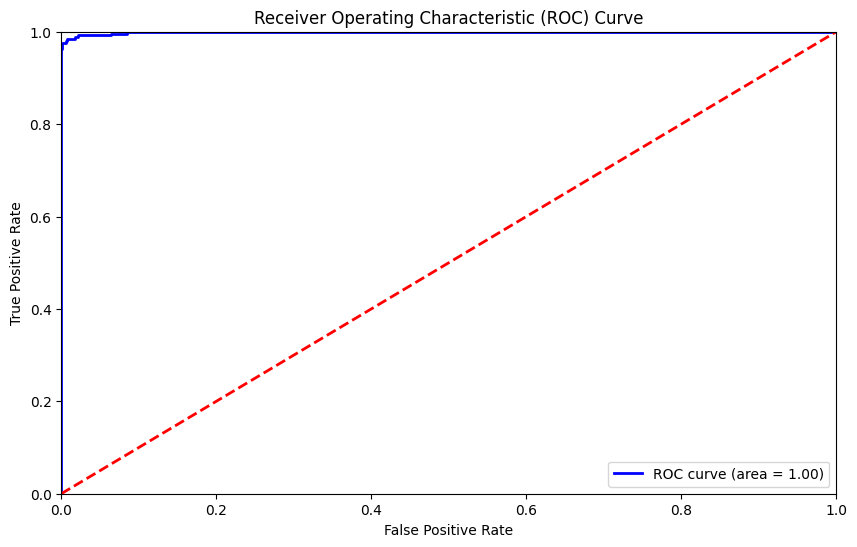

In [50]:
# menghitung probabilitas prediksi
y_prob = random_search.best_estimator_.predict_proba(X_test)[:, 1]

# menghitung ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# menghitung area ubder the curve (AUC) dari ROC
roc_auc = auc(fpr, tpr)

# Visualisasi ROC curve
plt.figure(figsize=(10, 6))
# plot ROC curve dengan label AUC
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
# plot garis diagonal sebagai baseline
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
#batas sumbu x
plt.xlim([0.0, 1.0])
# batas sumbuu y
plt.ylim([0.0, 1.0])
# menentukan label sumbu x
plt.xlabel('False Positive Rate')
# menentukan label sumbu y
plt.ylabel('True Positive Rate')
# judul grafik
plt.title('Receiver Operating Characteristic (ROC) Curve')
# menampilkan legenda di bawah kanan
plt.legend(loc='lower right')
# menampilkan plot
plt.show()


Based on the visualization above, it can be observed that the **area under the curve (AUC)** is **1.00**, indicating that the model has near-perfect performance in distinguishing between positive and negative classes.

### **Advantages of the Model**
1. **Perfect ROC-AUC Score (1.00):**  
   This indicates the model's exceptional ability to differentiate between positive and negative classes without error. The True Positive Rate (TPR) reaches 1 at nearly every False Positive Rate (FPR) point, demonstrating that the model makes almost no mistakes in predictions.
   
2. **Highly Accurate Classification:**  
   The model is likely to make very reliable predictions, providing strong decision-making capabilities in predicting loan approval outcomes.

### **Disadvantages of the Model**
1. **Potential Overfitting:**  
   A perfect ROC-AUC score might suggest that the model is overfitted to the training or test data. This means the model may not generalize well to unseen data, potentially underperforming in real-world scenarios.

### **Business Analysis**
1. **Business Benefits:**  
   In loan approval processes, a model with a perfect AUC can be highly beneficial. Its robust predictive capabilities can significantly reduce costs associated with poor decisions, such as lending to high-risk customers or failing to detect fraud effectively.

2. **Risk of Overconfidence:**  
   While the perfect score is impressive, over-reliance on such a model could pose risks if it fails to adapt to new customer behaviors or market conditions.

### **Suggestions for Further Improvement**
1. **Expand the Test Dataset:**  
   Test the model on larger and more diverse datasets to evaluate its performance comprehensively and identify potential overfitting issues.

2. **Add Regularization:**  
   Incorporate regularization techniques to mitigate overfitting and ensure the model generalizes well to new data.

3. **Use Alternative Metrics:**  
   Complement ROC-AUC with additional metrics such as Precision-Recall Curve, F1 Score, or Log Loss to provide a broader understanding of the model's strengths and weaknesses.

By implementing these steps, the model's robustness and real-world applicability can be improved, reducing potential risks while maintaining its high-performance level.

In [51]:
best_result = random_search.best_estimator_
best_result

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['education_level',
                                                   'home_ownership_status']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'annual_income',
                                                   'credit_score', 'experience',
                                                   'loan_amount',
                                                   'loan_duration',
                                                   'number_of_dependents',
                                                   'monthly_debt_payments',
                                                   'bankruptcy_h...
                                                   'previous_loan_defaults',
                                                   'length_of_credit_history',
                                                   'checking_account_balance',
                                                   'total_assets',
                                                   'monthly_income',
                                                   'net_worth',
                                                   'base_interest_rate',
                                                   'interest_rate',
                                                   'monthly_loan_payment',
                                                   'total_debt_to_income_ratio',
                                                   'risk_score'])])),
                ('smote',
                 SMOTENC(categorical_features=[5, 11], random_state=42)),
                ('classifier', SVC(C=0.1, kernel='linear', probability=True))])

# ix. Model Saving

Model saving is performed to store the trained machine learning model so that it can be reused in the future without the need for retraining from scratch. This allows users to make new predictions quickly, saving both time and computational resources.

In [52]:
with open('best_model.pkl', 'wb') as file_1:
  pickle.dump(best_result, file_1)

# x. Model Inference

Model inference aims to input new data into the trained machine learning model for analysis based on the steps previously applied during model development. Using this new data, we can predict the output—in this case, whether a customer's loan application will be approved or not. Inference is performed on a separate file to prevent data leakage from the data used to train and test the model.

# xi. Kesimpulan

Based on the analysis and processes conducted, the following conclusions can be drawn:  

### **Machine Learning Model**  
1. The machine learning model created by comparing five algorithms shows a tendency for overfitting, as the ROC-AUC values are nearly 1 for all models.  
2. The best-performing model can distinguish between positive and negative classes without errors, with a TPR score of 1 at almost all FPR points, indicating that the model makes nearly no mistakes in predictions.  

### **Business Perspective**  
1. **Targeted Customer Segmentation**:  
   - High-income customers can be offered premium products or low-interest loans.  
   - Customers with low credit scores can be guided toward financial education programs or provided credit offers with stricter conditions.  

2. **Personalized Credit Offers**:  
   - Offering longer loan terms for customers with many dependents can enhance product relevance and customer satisfaction.  

3. **Risk-Driven Strategies**:  
   - Differentiating interest rates or adjusting terms based on customers’ financial histories can minimize default risks while attracting low-risk customers.  